# Projectile Motion Assignment: Due 9/21

## 2D Projectile Motion with Quadratic Drag 

Quadratic drag term is given by $\vec{f}_{drag} = -cv\vec{v}$. This leads to equations of motion in the horizontal ($x$) and vertical ($y$) directions given by 

* $m v_{x}' = -\left(c\sqrt{v^2_x +v^2_y}\right)v_x$

* $m v_{y}' = - mg - \left(c\sqrt{v^2x + v^2_y}) \right)v_y$

* $x' = v_x$

* $y' = v_y$

,where $'$ is a time derivative.

## Problem

To get an accurate trajectory for a projectile one must often take account of several complications. For example, if a projectile goes very high then we have to allow for the reduction in air resistance as atmospheric density decreases. To illustrate this, consider an iron cannonball (diameter, $D = 15\;cm$, density $\rho = 7.8\;g/cm^3$) that is fired with initial velocity $300 m/s$ at 50 degrees above the horizontal. The drag force is approximately quadratic, but since the drag is proportional to the atmospheric density and the density falls off exponentially with height, the drag force is $f = c(y) v^2$ where $c(y) = \gamma D^2 exp(-y/\lambda)$ with $\gamma$ given as $0.25\;N\cdot s^2/m^4$ and $\lambda = 10,000\;m$. 

# Part a)

Ignoring air resistance completely, write down the equations of motion for the cannonball (use the markup feature in Jupyter notbook and latex (https://en.wikibooks.org/wiki/LaTeX/Mathematics)) 

* $x' = v_x$
* $y' = v_y$
* $v_{x}' = 0$
* $v_{y}' = -mg$

Code the equations into a function 

In [1]:
#define projectile motion function in vaccum

def proj_vac(t, y): #y=[x0, y0, vx0, vy0]
    dx_dt = y[2]
    dy_dt = y[3]
    dvx_dt = 0
    dvy_dt = -9.8
    return np.array([dx_dt, dy_dt, dvx_dt, dvy_dt])

Using Scipy (*RK4(5)* method) solve numerically $x(t)$ and $y(t)$ for $0 \le t \le 3.5\;s$

In [2]:
#code
import numpy as np
import scipy.integrate as sp
import matplotlib.pyplot as plt
import math
import pandas as pd
%matplotlib notebook

"""Initial Conditions: 
- 300 m/s at 50 deg. 
- t = [0, 3.5]
"""



x_init = 0
y_init = 0
vx_init = 300 * math.cos(50*math.pi/180)
vy_init = 300 * math.sin(50*math.pi/180)

y0 = [x_init, y_init, vx_init, vy_init]

t0 = 0
tf = 50
t = np.linspace(t0, tf, 100)

solution = sp.solve_ivp(proj_vac, (t0, tf), y0=y0, method='RK45', t_eval=t) 


# solution
df = pd.DataFrame(data=solution.y).swapaxes(0,1).rename(columns={0:"x(t)", 1:"y(t)", 2:"vx(t)", 3:"vy(t)"})
df["t"] = solution.t
df

,x(t),y(t),vx(t),vy(t),t
0,0.000000,0.000000,192.836283,229.813333,0.000000
1,97.392062,114.817467,192.836283,224.863838,0.505051
2,194.784124,227.135190,192.836283,219.914343,1.010101
3,292.176186,336.953167,192.836283,214.964848,1.515152
4,389.568248,444.271400,192.836283,210.015353,2.020202
...,...,...,...,...,...
95,9252.245897,-253.701682,192.836283,-240.388687,47.979798
96,9349.637959,-376.359983,192.836283,-245.338182,48.484848
97,9447.030021,-501.518028,192.836283,-250.287677,48.989899
98,9544.422083,-629.175818,192.836283,-255.237172,49.494949


Plot the ball's trajectory (vertical vs. horizontal positions) and find it's horizontal range

<IPython.core.display.Javascript object>


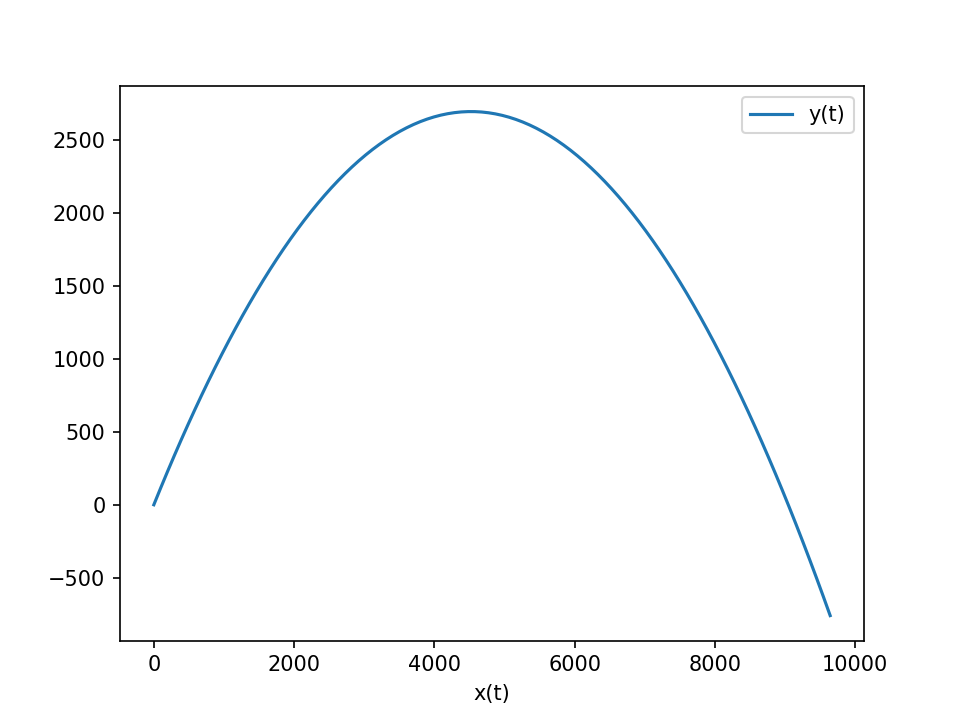

In [3]:
#codes
df.plot(x='x(t)', y='y(t)', kind='line')

# Part b)

Write your own Runge-Kutta order 4 function and use it to solve Part a) [Meaning do not use Scipy for this part].

In [4]:
def runge_kutta_4(f, t, x0):
    n = len(t)
    x = np.zeros((n, len(x0)))
    x[0] = x0
    for i in range(0, n-1):
        dx = t[i+1] - t[i]
        k1 = f(t[i], x[i])
        k2 = f(t[i] + dx/2.0,x[i] + (dx/2.0)*k1)
#         print('k2', k2)
        k3 = f(t[i] + dx/2.0, x[i] + (dx/2.0)*k2)
#         print('k3', k3)
        k4 = f(t[i] + dx, dx*k3)
#         print(k4)
        x[i+1] = x[i] + (dx/6.0)*(k1 + 2.0*k2 + 3.0*k3 + k4)
    return x

In [5]:
# Initial Conditions: 
n = 101
t0=0
tf=3.5
t_array = np.linspace(t0, tf, n)
y0 = [0, 0., vx_init, vy_init]

sol_rk4 = runge_kutta_4(proj_vac, t_array, y0)


How does your Runge-Kutta 4th order evaluation compare to Scipy's *RK4(5)* method?

# Part c)

Now include air resistance, but ignore the variation of atmospheric pressure [that is  treat $c(y)$ as a constant  that does not change with position, where $c = \gamma D^2$].

Write down the equations of motion (use the markup feature in Jupyter notbook and latex)

* $m v_{x}' = -\left(c\sqrt{v^2_x +v^2_y}\right)v_x$

* $m v_{y}' = - mg - \left(c\sqrt{v^2x + v^2_y}) \right)v_y$

* $x' = v_x$

* $y' = v_y$

Code the equations into a function

In [10]:
#code
gam = 0.25 # N * (s^2/m^4)
diam = 0.15 # m
mass = gam * ((4/3)*math.pi*(diam/2)**2)

def proj_const_drag(t, y): #y=[x, y, vx, vy]
    c = (gam * diam**2)
    dx_dt = y[2]
    dy_dt = y[3]
    dvx_dt = (-(c*math.sqrt(y[2]**2 + y[3]**2))*y[2])
    dvy_dt = (-(9.8*mass) - (c*math.sqrt(y[2]**2 + y[3]**2))*y[3])
    return [dx_dt, dy_dt, dvx_dt, dvy_dt]

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 3.5\;s$

<IPython.core.display.Javascript object>


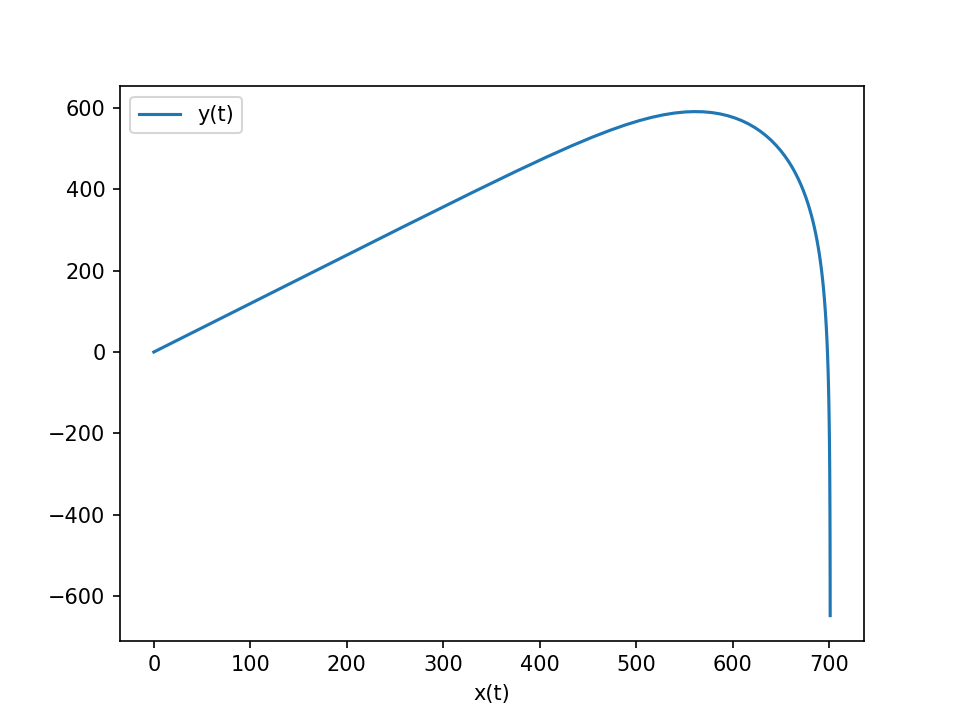

In [11]:
#codes
y0 = [0, 0, vx_init, vy_init]
t0 = 0
tf = 500
n=100
t2 = np.linspace(t0, tf, n)
solution2 = sp.solve_ivp(proj_const_drag, (t0, tf), y0=y0, method='RK45', t_eval=t2) 
df3 = pd.DataFrame(data=solution2.y).swapaxes(0,1).rename(columns={0:"x(t)", 1:"y(t)", 2:"vx(t)", 3:"vy(t)"})
df3.plot(x='x(t)', y='y(t)', kind='line')

Plot the ball's trajecory and find it's horizontal range

# Part d)

Now include the drag term with the atmospheric variation included [meaning $c(y) = \gamma D^2exp(-y/\lambda)$]

Write down the equations of motion (use the markup feature in Jupyter notbook and latex)

* $m v_{x}' = -\left(c(y)\sqrt{v^2_x +v^2_y}\right)v_x$

* $m v_{y}' = - mg - \left(c(y)\sqrt{v^2x + v^2_y}) \right)v_y$

* $x' = v_x$

* $y' = v_y$

Code the equations into a function

In [13]:
#code

def proj_var_drag(t, y): #y = [x, y, vx, vy]
    dc_dt = gam*(diam**2)*(math.e**(-y[1]/gam))
    dx_dt = y[2]
    dy_dt = y[3]
    dvx_dt = (-(dc_dt*math.sqrt(y[2]**2 + y[3]**2))*y[2])
    dvy_dt = (-(9.8*mass) - (dc_dt*math.sqrt(y[2]**2 + y[3]**2))*y[3])
    return [dx_dt, dy_dt, dvx_dt, dvy_dt]

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 3.5\;s$

<IPython.core.display.Javascript object>


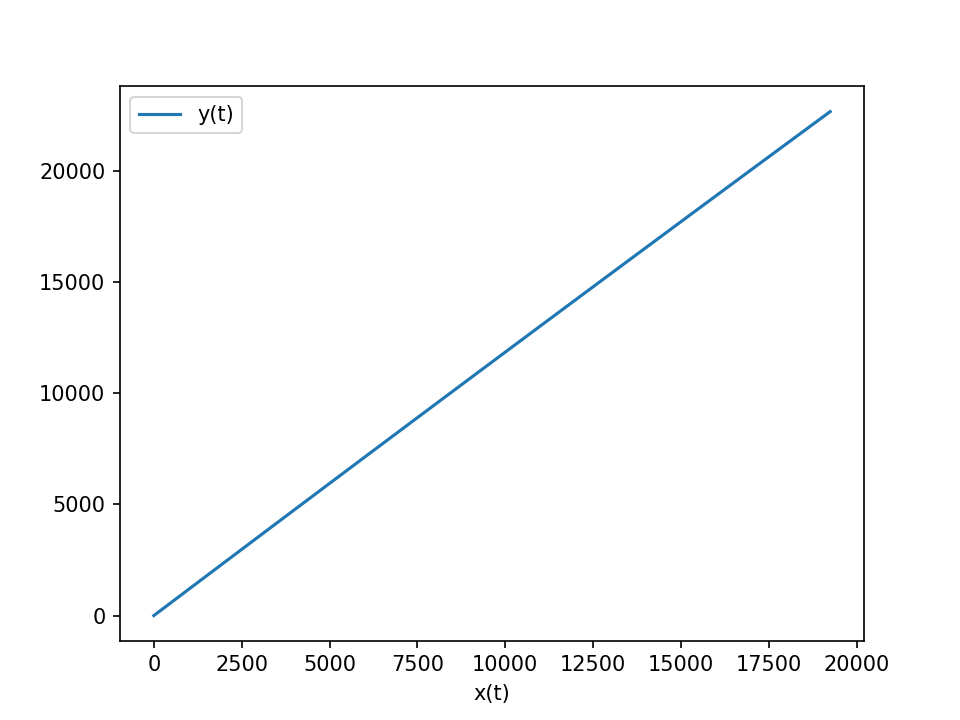

In [18]:
y0 = [0, 0, vx_init, vy_init]
t0 = 0
tf = 100
n=100
t3 = np.linspace(t0, tf, n)
solution3 = sp.solve_ivp(proj_var_drag, (t0, tf), y0=y0, method='RK45', t_eval=t3) 
df4 = pd.DataFrame(data=solution3.y).swapaxes(0,1).rename(columns={0:"x(t)", 1:"y(t)", 2:"vx(t)", 3:"vy(t)"})
df4.plot(x='x(t)', y='y(t)', kind='line')

Plot the ball's trajectory and find it's horizontal range

In [6]:
#codes

# Part e)

Plot the trajectories from parts a), c), and d) on the same plot.

In [7]:
#codes

Which impacts the motion more: turning on air resistance (i.e with $c(0)$) or turning on the variation with atmosphere (i.e. $c(y)$)